# TPC2 - Cadeias de Markov

*  Não deve escrever o seu nome nem nenhum código identificador em nenhum
sítio. 
* Deve entregar ESTE Notebook de Jupyter.
* O trabalho é individual. Podem e devem haver discussões com colegas
mas o resultado entregue é individual. 
* Não deve acrescentar ou apagar nenhuma célula.
* Todas as explicações devem ser claras e concisas. 
* É preferível fazer menos e fazer bem que muito e mal. 
* A não verificação de alguma destas regras leva ao anulamento e exclusão
da prova.

In [342]:
# Módulos
from typing import Callable

import matplotlib.pyplot as plt

import numpy as np
import scipy as sp

## Pergunta 1
***Partícula num potencial:*** 
Considere uma partícula que se move
num potencial de energia livre dependente da posição dado por 
\begin{equation}
V_{\beta}(x)=x^{4}-2(\beta-1)x^{2}
\end{equation}
supondo que a partícula está em contacto térmico com um reservatório
de calor caracterizado por $\beta$ (inverso da temperatura) e a distribuição
de probabilidade da partícula estar numa dada posição é dada por 
\begin{equation}
\rho_{\beta}(x)=\frac{e^{-\beta V_{\beta}(x)}}{Z(\beta)}
\end{equation}
onde $Z(\beta)$ é a função de partição do sistema.

1. Considere o passeio aleatório especial: A variável $x$ é discreta
e toma valores $x_{n}=0.04n$ com $n\in\mathbb{Z}$. Em cada tempo
o caminhante decide se tenta saltar para a direita ($\Delta x=0.04$)
ou para esquerda ($\Delta x=-0.04$) com probabilidade $1/2$ e aceita
a proposta com 
\begin{equation}
p_{A}(x(t-1)\to x(t-1)+\Delta x)=\min\left(1,e^{-\beta\left(V_{\beta}(x(t-1)+\Delta x)-V_{\beta}(x(t-1))\right)}\right)
\end{equation}
Se aceitou a sua variável $x$ altera-se para $x+\Delta x$, caso
contrário, fica no mesmo valor de $x$. 

$\qquad$a) Escreva uma função que implementa este algoritmo durante um tempo $t$ partindo de uma posição inicial (devolve o valor de $x$ ao fim desse tempo).

## Alínea 1 a)

Vamos usar o algoritmo de Metropolis para implementar o passeio aleatório, sendo a distribuição para a escolha de candidatos para a próxima posição:
$$
\begin{align*}
E_{ij} &= \begin{cases}
\frac12 &\text{se } x_i = x_j + \Delta x
\\
0 &\text{caso contrário}
\end{cases}
\end{align*}
$$

Onde $\Delta x = \pm0.04$ e $E_{ij}$ corresponde à probabilidade de escolher o estado $x_i$ partindo do estado $x_j$.
Temos também a seguinte probabilidade de aceitação:
$$
\begin{align*}
A_{ij} &= \min\left(1, \frac{E_{ji}\rho_\beta(x_i)}{E_{ij}\rho_\beta(x_j)}\right)
\\\\
&= \min\left(1, \frac{e^{-\beta V_\beta(x_i)}/2}{e^{-\beta V_\beta(x_j)}/2}\right)
\\\\
&= \min\left(1, e^{-\beta(V_\beta(x_i) - V_\beta(x_j))}\right)
\\\\
&= \min\left(1, e^{-\beta(V_\beta(x_j + \Delta x) - V_\beta(x_j))}\right)
\\\\
&= \min\left(1, e^{\beta(V_\beta(x_j)-V_\beta(x_j + \Delta x))}\right)
\end{align*}
$$
---


Podemos também aproveitar para estudar o potencial em jogo:
$$
\begin{align*}
V'_\beta(x) &= 4x^3 - 4(\beta - 1)x
\\\\
&= 4x(x^2 - (\beta-1))
\\\\
V''_\beta(x) &= 4(x^2 - (\beta-1)) + 4x \cdot 2x
\\\\
&= 4(3x^2 - (\beta-1))
\end{align*}
$$

Os pontos críticos são:
$$
\begin{align*}
V'_\beta(x) = 0 &\Leftrightarrow x = 0 \vee x^2 = \beta-1
\end{align*}
$$

Ou seja, para $\beta < 1$ temos apenas um ponto crítico em $x=0$, e para $\beta > 1$ passamos também a ter pontos críticos em $\pm \sqrt{\beta-1}$.

Temos ainda:
$$
\begin{align*}
V''_\beta(0) &= 4(1-\beta)
\\\\
V''_\beta(\pm\sqrt{\beta-1}) &= 4(3(\beta-1)-(\beta-1))
\\\\
&= 8(\beta-1) 
\end{align*}
$$

Ou seja:
- O ponto $x=0$ será um mínimo do potencial se $\beta<1$ e um máximo caso $\beta>1$.
- Os pontos em $x = \pm \sqrt{\beta-1}$ só são pontos críticos caso $\beta > 1$ e nesse caso são mínimos.


## Análise dos Resultados
Ao escolhermos $\beta < 1$ para termos um mínimo da energia em $x=0$ percebemos que a posição da partícula esta restrita pelo potencial.

Numa caminhada aleatória (não especial) a uma dimensão de passo $\Delta x$ o desvio padrão da distribuição assintótica será de $\Delta x\sqrt t$, e podemos ver pelo gráfico que esta caminhada aleatória especial está restrita a posições menores que esse valor.

Este comportamento fica mais claro se multiplicarmos o potencial em jogo por uma constante maior que $1$ (se o fizemos vemos que a partícula afasta-se menos do ponto de equilíbrio, como esperado).

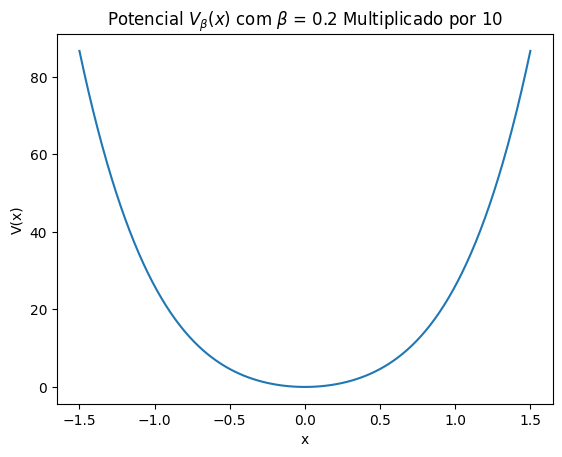

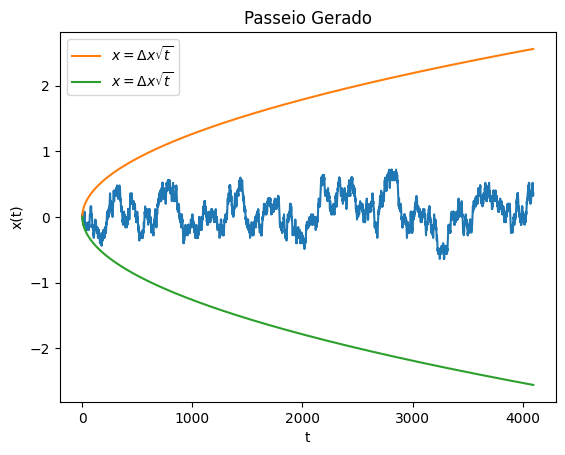

In [343]:
def passeio1d(V: Callable, beta: float, delta: float, x0: np.ndarray, t: int) -> np.ndarray:
    """
        Simula `N` passeios aleatórios discretos a uma dimensão no potencial V(x) de uma partícula em contacto térmico com um reservatório de calor caracterizado por `beta`, permitindo apenas posições para `x = x0 + k * delta` para `k` inteiro.

        Utiliza o algoritmo de Metropolis com probabilidade de seleção igual a 50% para `x1 = x0 + delta` e `x1 = x0 - delta` e probabilidade de aceitação dada pela distribuição de Boltzmann.

        Começa os passeios nas posições indicadas pelo vetor `x0` e termina o passeio após `t` passos, devolvendo o caminho percorrido.

        Devolve uma matriz xx onde xx[i, j] corresponde à posição da partícula i no instante de tempo j.
    """
    # Número de partículas em jogo
    N = len(x0)

    # Dar t passos
    xx = np.zeros((N, t+1))
    xx[:,0] = x0
    for k in range(t):
        # Devolve 1/-1 com 50%/50% de probabilidade 
        passo = (np.random.random(N) < 0.5) * 2 - 1

        # Probabilidade de aceitação (não precisamos de fazer o mínimo com 1 pois se pa > 1 então irá aceitar o valor de certeza, que é o mesmo comportamento que temos para pa = 1)
        # pa = min(1, np.exp(beta * (V(x0) - V(x0 + passo * delta))))
        pa = np.exp(beta * (V(x0) - V(x0 + passo * delta)))

        # Aceitar o passo?
        aceitar = np.random.random(N) < pa

        # Avançar para x1 ou manter x0
        x0 = x0 + aceitar * passo * delta

        # Guardar o novo estado
        xx[:,k+1] = x0
    
    # Devolver o caminho gerado
    return xx


# Potencial em jogo
def gerarV(beta: float) -> Callable:
    return lambda x: x**4 - 2 * (beta - 1) * x**2


# Potencial multiplicado
def gerarVM(beta: float, m: float) -> Callable:
    return lambda x: m * (x**4 - 2 * (beta - 1) * x**2)


# Testar a função
t1 = 2**12
p0 = 0
delta12b = 0.04
beta12b = 0.2

m = 10
V12b = gerarVM(beta12b, m)

tt12b = np.arange(t1+1)
pp = passeio1d(V12b, beta12b, delta12b, np.array([p0]), t1)[0]


# Representar graficamente o potencial
xx = np.linspace(-1.5, 1.5, 100)
vv = V12b(xx)
plt.plot(xx, vv)
plt.title(f"Potencial $V_\\beta(x)$ com $\\beta$ = {beta12b} Multiplicado por {m}")
plt.xlabel("x")
plt.ylabel("V(x)")
plt.show()

# Representar graficamente o passio
plt.plot(pp)
plt.plot(np.sqrt(tt12b) * delta12b, label="$x = \\Delta x \\sqrt{t}$")
plt.plot(-np.sqrt(tt12b) * delta12b, label="$x = \\Delta x \\sqrt{t}$")
plt.title("Passeio Gerado")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.legend()
plt.show()

$\qquad$ b) Escreva uma matriz de Markov que representa este algoritmo limitando a variável de posição ao intervalo $x\in[-2,2]$ - Sempre que uma proposta tentar sair do intervalo recusa.

# Alínea 1 b)

Começamos por escrever a posição da partícula como:
$$
\begin{align*}
x_n &= \Delta xn \quad &&n \in \{-50, \dots, 50\}
\\\\
x_i &= \Delta x(i-50) \quad &&i \in \{0, \dots, 100\}
\end{align*}
$$

Podemos então escrever:
$$
\begin{align*}
E_{ij} &= \begin{cases}
\frac12 &\text{se } i = j \pm 1
\\
0 &\text{caso contrário}
\end{cases}
\end{align*}
$$

E a probabilidade de aceitação mantém-se igual:
$$
\begin{align*}
A_{ij} &= \min\left(1, e^{\beta(V_\beta(x_j)-V_\beta(x_i))}\right)
\end{align*}
$$

Temos então as seguinte entradas na matriz de Markov $W$, que será uma matriz $101 \times 101$, onde $W_{ij}$ representa a probabilidade de passar do estado $j$ para o estado $i$:
$$
\begin{align*}
W_{ij} &= \begin{cases}
A_{ij}E_{ij} &\text{se }i = j+1 \wedge j \in \{0, \dots, 99\}
\\\\
A_{ij}E_{ij} &\text{se }i = j-1 \wedge j \in \{1, \dots, 100\}
\\\\
1-A_{(i-1)j}E_{(i-1)j}&\text{se } i = 100 \wedge j = 100
\\\\
1-A_{(i+1)j}E_{(i+1)j}&\text{se } i = 0 \wedge j = 0
\\\\
1-A_{(i-1)j}E_{(i-1)j}-A_{(i+1)j}E_{(i+1)j}&\text{se } i = j
\\\\
0 &\text{caso contrário}
\end{cases}
\end{align*}
$$

Onde:
- A primeira linha é a probabilidade de aceitarmos um movimento para a direita.
- A segunda linha é a probabilidade de aceitarmos um movimento para a esquerda.
- A terceira linha diz que caso estejamos em $x=2$ então ou avançamos para a esquerda ou ficamos no mesmo sítio (não podemos avançar para a direita).
- A quarta linha diz que caso estejamos em $x=0$ então ou avançamos para a direita ou ficamos no mesmo sítio (não podemos avançar para a esquerda).
- A quinta linha diz que a probabilidade de ficarmos no mesmo sítio é igual à probabilidade de não irmos nem para a direita nem para a esquerda!
- A sexta linha diz que nos todas as outras transições são impossíveis (podiamos também ter escrito $A_{ij}E_{ij}$ pois nestes casos $E_{ij} = 0$).

A sexta linha permite-nos trocar $E_{ij}$ na nossa expressão simplesmente por $1/2$.


In [344]:
def markov(V: Callable, beta: float, delta: float, N: int) -> np.ndarray:
    """
        Devolve a matriz de Markov descrita acima, generalizada para poder ter um tamanho `N` por `N` qualquer.
    """
    # Valor mínimo e máximo de x
    xmax = (N-1)/2 * delta 
    xmin = -xmax

    # Calcular x
    def xi(i: int) -> float:
        return xmin + delta * i

    # Preencher a matriz
    W = np.zeros((N, N))
    for j in range(1, N-1):
        W[j+1, j] = min(1, np.exp(beta * (V(xi(j)) - V(xi(j+1)))))/2
        W[j-1, j] = min(1, np.exp(beta * (V(xi(j)) - V(xi(j-1)))))/2
        W[j, j] = 1 - W[j+1, j] - W[j-1, j]
    
    # Caso j = 0
    W[1, 0] = min(1, np.exp(beta * (V(xi(0)) - V(xi(1)))))/2
    W[0, 0] = 1 - W[1, 0]

    # Caso j = N-1
    W[N-2, N-1] = min(1, np.exp(beta * (V(xi(N-1)) - V(xi(N-2)))))/2
    W[N-1, N-1] = 1 - W[N-2, N-1]

    return W


# Parâmetros
N12b = 101
delta12b = 0.04
beta12b = 1.2
V11b = gerarV(beta12b)

# Matriz pedida no problema
W11b = markov(V11b, beta12b, delta12b, N12b)

# Verificar que todas as entradas estão em [0, 1]
for j in range(N12b):
    for i in range(N12b):
        if W11b[i, j] < 0 or W11b[i, j] > 1:
            print(f"Erro na entrada {i}, {j}")
            break
else:
    print("Todas as entradas estão em [0, 1]!")

# Verificar que as colunas têm soma 1
for j in range(N12b):
    total = sum(W11b[:,j])
    if total != 1:
        print(f"Erro na coluna {j}")
        break
else:
    print("Todas as colunas da matriz W têm entradas cuja soma é 1!\n")

print(W11b.round(3))

Todas as entradas estão em [0, 1]!
Todas as colunas da matriz W têm entradas cuja soma é 1!

[[0.5   0.122 0.    ... 0.    0.    0.   ]
 [0.5   0.378 0.133 ... 0.    0.    0.   ]
 [0.    0.5   0.367 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.367 0.5   0.   ]
 [0.    0.    0.    ... 0.133 0.378 0.5  ]
 [0.    0.    0.    ... 0.    0.122 0.5  ]]


2. Para $\beta=1.4$

$\qquad$ a) Escolha um valor de $x_{0}=0$ para o seu caminhante no instante inicial
$t=0$. 

# Alínea 2 a)

Feito na alínea seguinte.

In [345]:
# Feito na alínea seguinte

$\qquad$ b) Evolua a distribuição de probabilidades durante um tempo $t=1,4,16,64,256,512$ e represente a distribuição de probabilidade da simulação para esses instantes.

# Alínea 2 b)

Usamos a função da alínea 1 a) para fazer várias simulações em simultâneo.


## Análise dos Resultados
Evoluindo uma mesma simulação ao longo do tempo e repsentando o seu estado em vários instantes podemos ver que a partícula está restrita a mover-se na zona de potencial baixo.

Mais ainda, podemos ver que há dois picos (pouco acentuados) que se formam na distribuição de probabilidade para a posição da partícula.

Tal como vimos acima, o potencial gerado terá mínimos em $x = \pm\sqrt{\beta-1}$, mas como podemos ver pelo gráfico, o mínimo é pouco profundo.

Podemos ainda perceber que os máximos de probabilidade para a posição da partícula correspondem aos mínimos do potencial, como seria de esperar para uma partícula cujo estado é descrito pela distribuição de Boltzmann.

Estes fenómenos ficam mais claros se aumentarmos $\beta$ para por exemplo $2.4$.

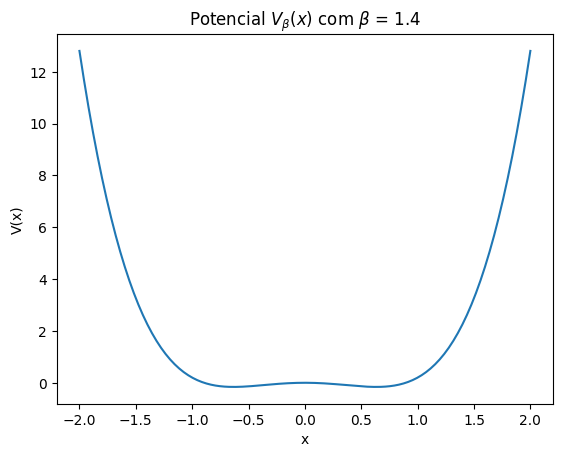

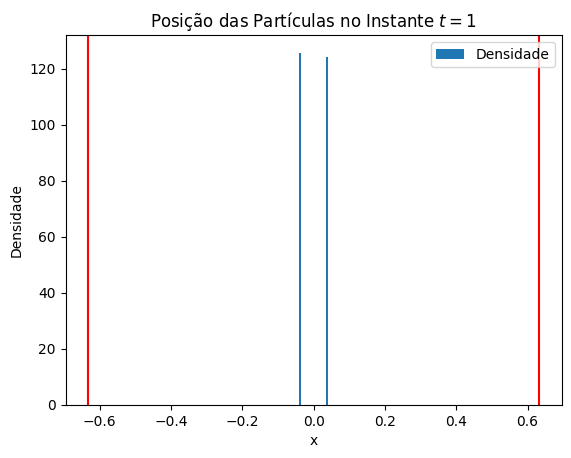

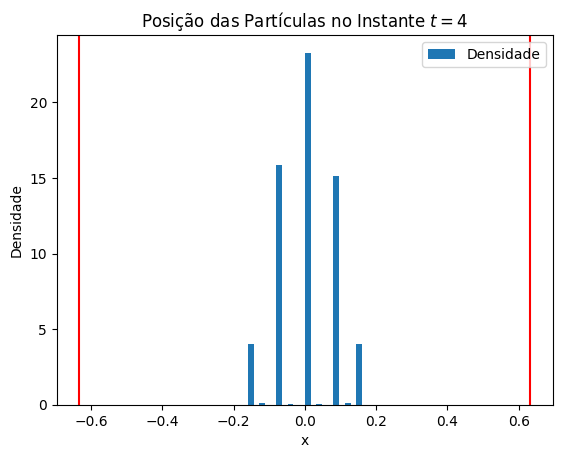

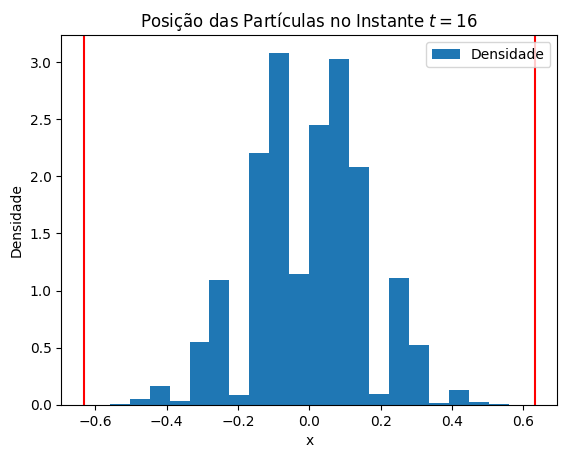

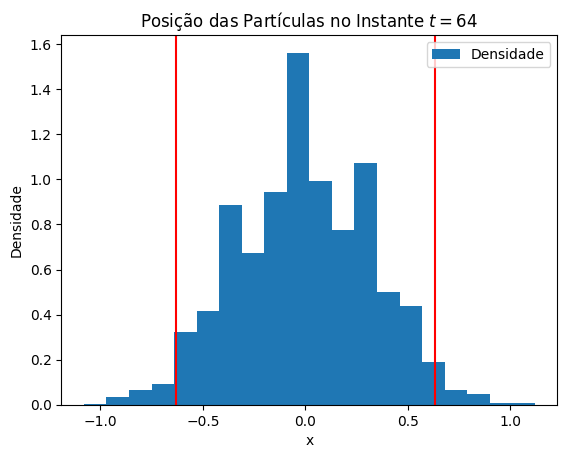

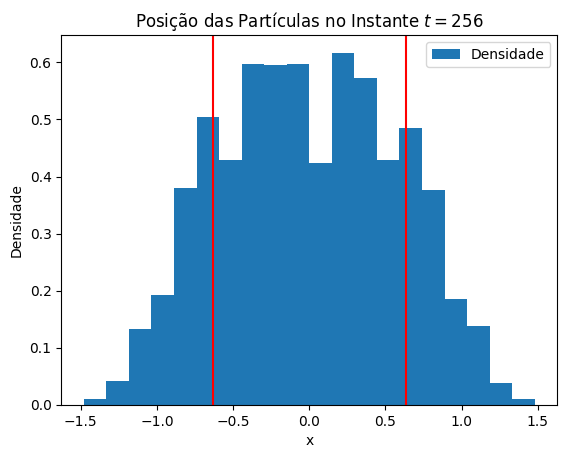

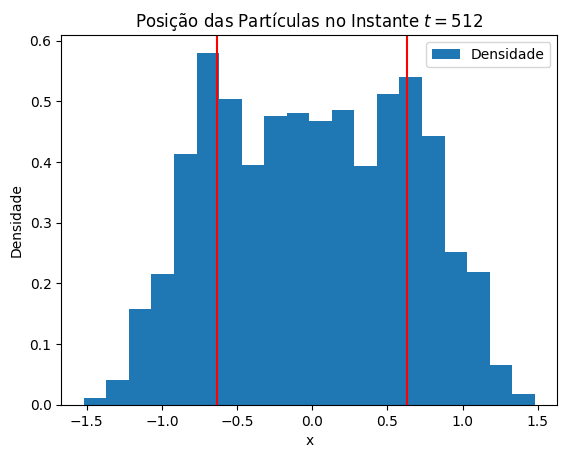

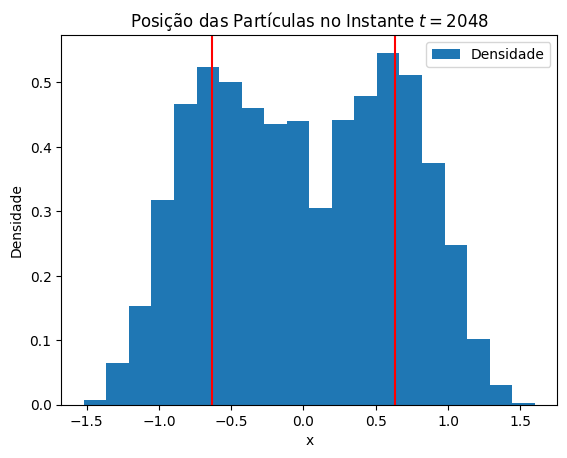

In [346]:
# Gerar amostras
delta12b = 0.04
beta12b = 1.4
V12b = gerarV(beta12b)

# Tempos
tt12b = [1, 4, 16, 64, 256, 512, 2048]

# Representar graficamente o potencial em jogo
xx = np.linspace(-2, 2, 200)
vv = V12b(xx)
plt.plot(xx, vv)
plt.title(f"Potencial $V_\\beta(x)$ com $\\beta$ = {beta12b}")
plt.xlabel("x")
plt.ylabel("V(x)")
plt.show()

# Guardar dados para a alínea seguinte
dd12c = []

N12b = 2**13
p0 = np.zeros(N12b)
t0 = 0
for t1 in tt12b:
    # Avançar t - t0 instantes
    pp = passeio1d(V12b, beta12b, delta12b, p0, t1 - t0)

    # Posição final das partículas
    ff = pp[:, t1-t0]

    dd12c += [ff]

    # Representar graficamente as posições finais do passeio
    plt.hist(ff, label="Densidade", bins=20, density=True)
    plt.title(f"Posição das Partículas no Instante $t = {t1}$")
    plt.axvline(np.sqrt(beta12b-1), color="red")
    plt.axvline(-np.sqrt(beta12b-1), color="red")
    plt.xlabel("x")
    plt.ylabel("Densidade")
    plt.legend()
    plt.show()

    # Guardar o novo estado
    p0 = ff
    t0 = t1

$\qquad$ c) Calcule a matriz de Markov que obteve em 1.b) e calcule para cada
um destes tempos calcule e represente, 
\begin{equation}
\sum_{j}[\Omega^{t}]_{ij}P_{j}(0)
\end{equation}
Será que a matriz de Markov representa exactamente o algoritmo implementado? 

# Alínea 2 c)

Usamos a função da alínea 1 b) para calcular a matriz de Markov para os tempos pedidos.

Como na alínea 2 b) começamos sempre com $x = 0$ temos que $P_j(0) = \delta_{ij}$ onde $i$ é o indice tal que $x_i = 0$. Observando a definição da matriz de Markov acima, sendo $D$ o número de posições possíveis da partícula, temos que $i = \left\lfloor \frac D2\right\rfloor$.


## Análise dos Resultados
Observamos desde logo que os mínimos de potencial correspondem às posições de máxima probabilidade segundo a matriz de Markov!

Para além disso, percebemos que a matriz de Markov descreve bem o processo para $t$ pequeno (havendo sobreposição quase total entre as duas previsões).

Para $t$ maior temos uma discrepância maior, como tal podemos avaliar se a matriz de Markov descreve este processo comparando os dados obtidos pela simulação anterior com uma extração direta da distribuição de probabilidade sugerida pela matriz de Markov!

Comparando os dois gráficos percebemos que a matriz de Markov de facto descreve bem o algoritmo implementado.

---

A principal fonte de erro seria o facto de estarmos a limitar a posição da partícula a $[-2, 2]$, mas tal não afeta o resultado pois a probabilidade de a partícula sair dessa gama de posições é baixa, uma vez que o potencial que teria de ultrapassar é muito elevado.

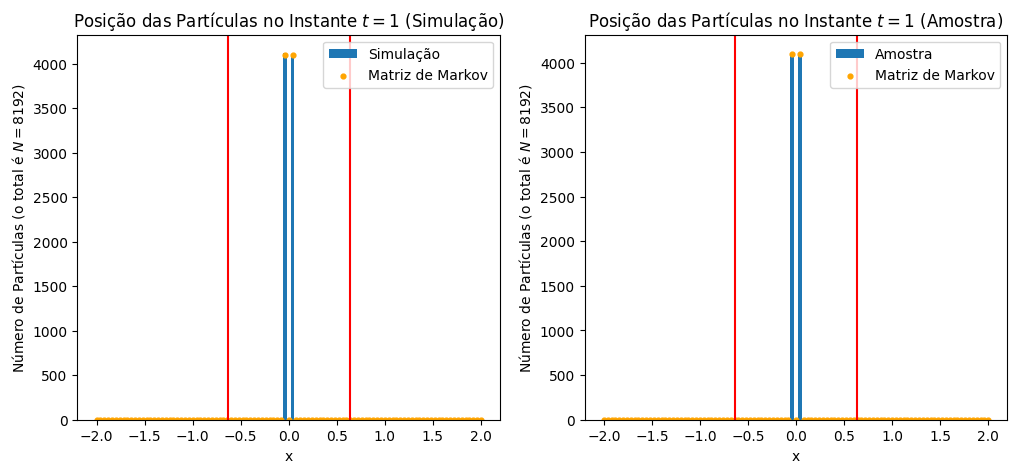

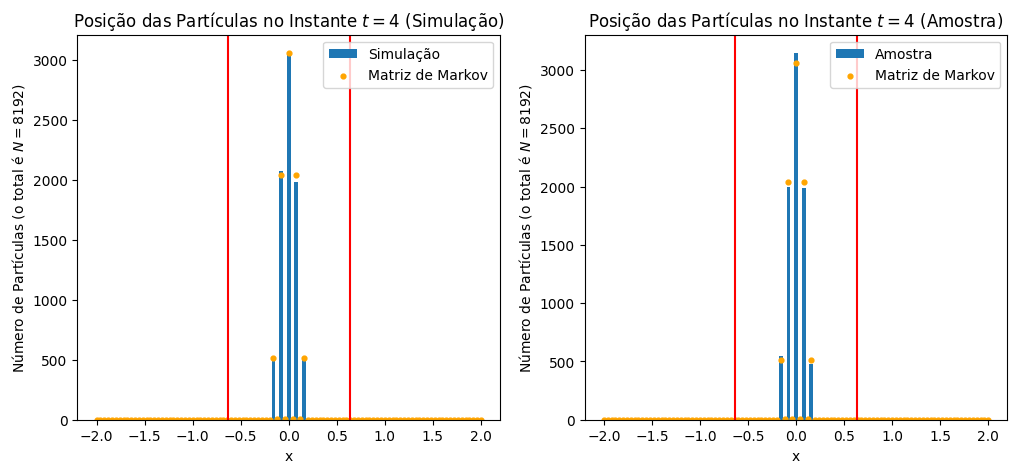

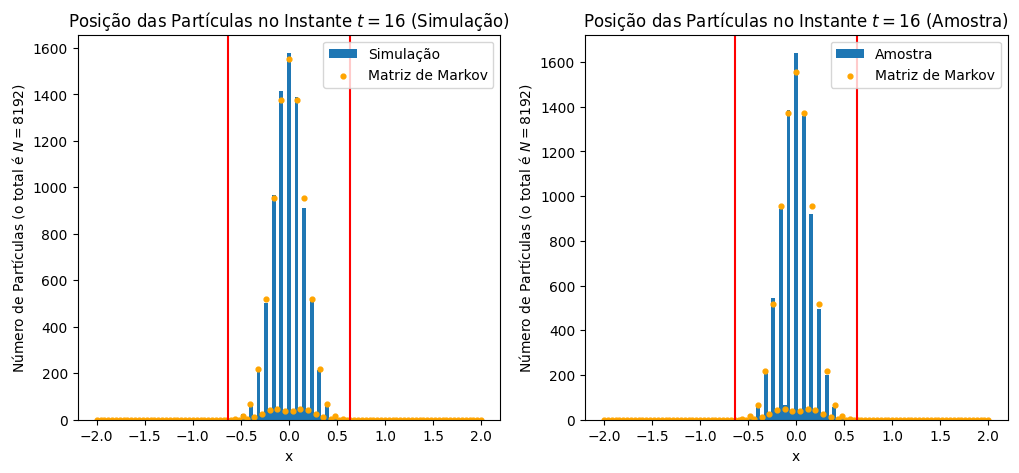

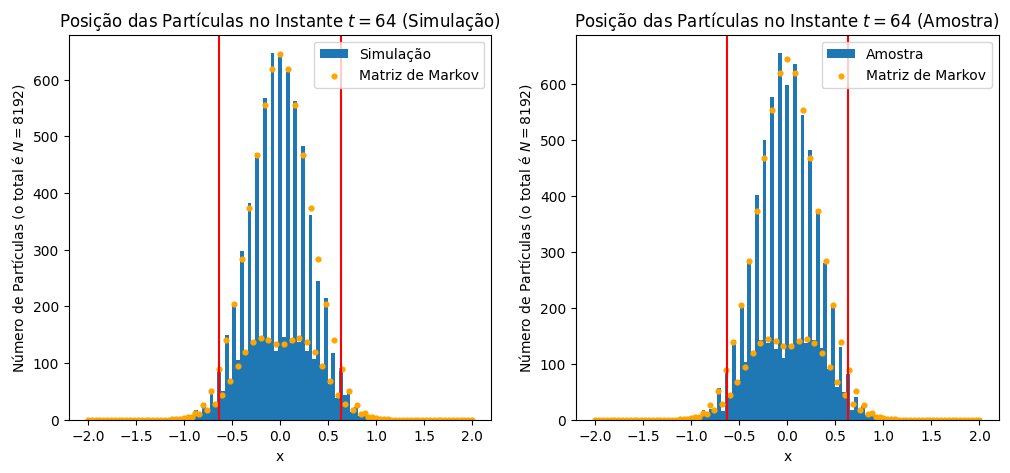

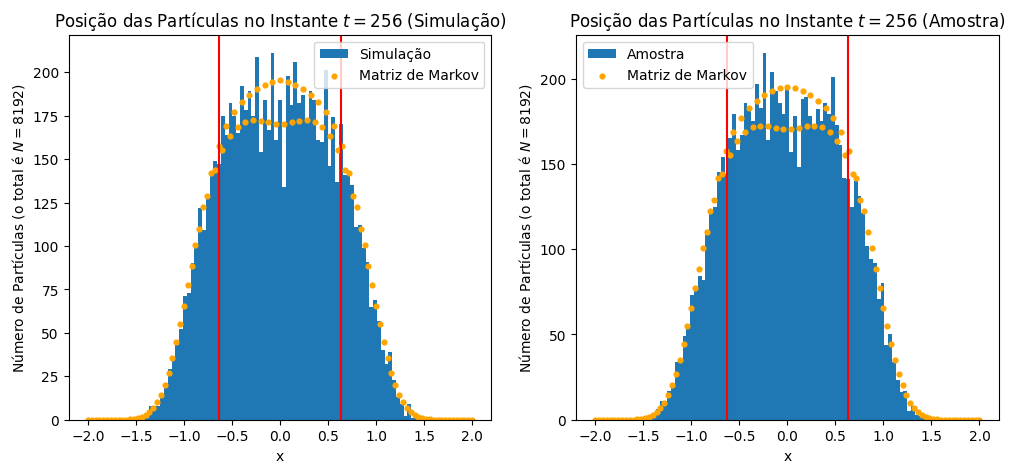

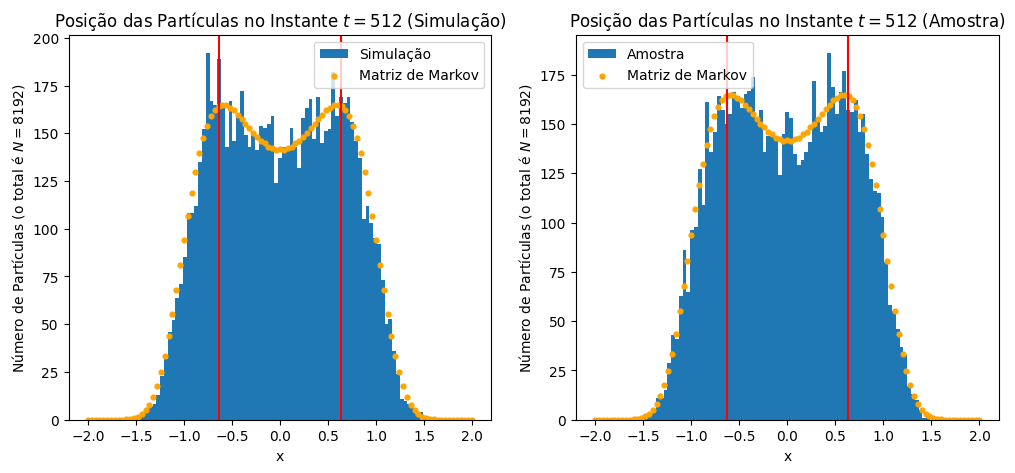

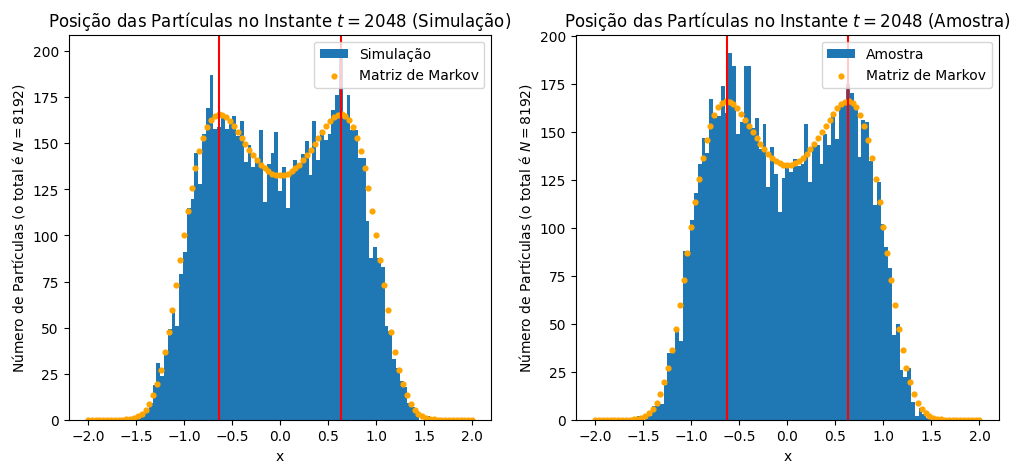

In [347]:
# NOTA: Executar a célula da alínea 1.2 b) imediatamente antes de executar esta, pois estamos a comprar os dados dos dois problemas!

def probacumulada(p: np.ndarray) -> np.ndarray:
    """
        Dada uma função de probabilidade `p` que se supõem estar definida para eventos em {0, 1, ..., M-1} onde M é algum inteiro devolve a respetiva função de probabilidade acumulada.
    """

    # Calcular a probabilidade
    return np.array([sum(p[0:i+1]) for i in range(len(p))])


def invdiscreto(c: np.ndarray, N: int) -> np.ndarray:
    """
        Dada uma função de probabilidade acumulada `c` que se supõem estar definida para eventos em {0, 1, ..., M-1} onde M é algum inteiro devolve `N` amostras retiradas da respetiva distribuição usando o método da inversão no discreto.
    """
    
    # Resultados
    res = np.empty(N)
    for i in range(N):
        a = np.random.rand()
        res[i] = sum(c < a)
    
    return res


# Parâmetros
delta = 0.04
D = 101

# Matriz para um passo
W12c = markov(V12b, beta12b, delta12b, D)

# Matriz elevada a cada t
WW12c = []
for t in tt12b:
    WW12c += [np.linalg.matrix_power(W12c, t)]


# Calcular a distribuição prevista pela matriz de Markov em t e comparar com a que observamos na simulação!
for i, W in enumerate(WW12c):
    # Posições finais simuladas
    ff = dd12c[i]

    # Posições finais previstas pela matriz
    mm = W[:, D//2]
    
    # Posições finais extraidas da distribuição
    ee = invdiscreto(probacumulada(mm), N12b)
    ee = delta * (ee - D//2)


    # Juntar os gráficos 2 a 2
    cols = 2
    rows = 1
    plt.figure(figsize=(6 * cols, 5 * rows))

    # Representar graficamente as posições finais do passeio
    plt.subplot(rows, cols, 1)
    plt.hist(ff, label="Simulação", range=(-2, 2), bins=D)
    plt.scatter(np.linspace(-2, 2, D), mm * N12b, label="Matriz de Markov", c="orange", s=12)
    plt.title(f"Posição das Partículas no Instante $t = {tt12b[i]}$ (Simulação)")
    plt.axvline(np.sqrt(beta12b-1), color="red")
    plt.axvline(-np.sqrt(beta12b-1), color="red")
    plt.xlabel("x")
    plt.ylabel(f"Número de Partículas (o total é $N = {N12b}$)")
    plt.legend()

    # Representar graficamente os valores extraídos da distribuição prevista pela matriz de Markov
    plt.subplot(rows, cols, 2)
    plt.hist(ee, label="Amostra", range=(-2, 2), bins=D)
    plt.scatter(np.linspace(-2, 2, D), mm * N12b, label="Matriz de Markov", c="orange", s=12)
    plt.title(f"Posição das Partículas no Instante $t = {tt12b[i]}$ (Amostra)")
    plt.axvline(np.sqrt(beta12b-1), color="red")
    plt.axvline(-np.sqrt(beta12b-1), color="red")
    plt.xlabel("x")
    plt.ylabel(f"Número de Partículas (o total é $N = {N12b}$)")
    plt.legend()
    plt.show()

$\qquad $d) Para a matrix de Markov calculada em 1.b) obtenha o espectro de valores
próprios e os vectores próprios à direita e à esquerda usando os módulos
de python ( por exemplo $scipy.linalg.eig$ ou o $mpmath.eig$ se precisar
de maior precisão). Garanta que os vectores estão normalizados e são
ortogonais:
\begin{equation}
\sum_{i}l_{i}^{(n)}r_{i}^{(m)}=\delta_{mn}
\end{equation}
onde $m$ e $n$ são índices dos valores próprios, $r_{i}^{(n)}$
é o vector próprio à direita e $l_{i}^{(n)}$ p vector próprio à esquerda
($i$ são os indices do espaço de eventos). Verifique que para cada
tempo considerado a distribuição de probabilidade é dada por 
\begin{equation}
P_{i}(t)=\sum_{n}\lambda_{n}^{t}a_{n}r_{i}^{(n)}
\end{equation}
onde $a_{n}=\sum_{i}l_{i}^{(n)}P_{i}(0)$.

$\qquad$ i) Quantos valores próprios $\lambda=1$ obtém?

# Alínea 2 d) i)
Vamos calcular os valores próprios à esquerda usando o facto de que são valores próprios à direita da matriz transposta:
$$
\begin{align*}
lW = \lambda W &\Leftrightarrow W^Tl^T= \lambda l^T
\end{align*}
$$

## Análise dos Resultados
Começamos por verificar algumas propriedades esperadas:
- Todos os valores próprios são reais (há apenas um estado assintótico não cíclico, consequência da matriz de Markov ter as propriedaes ergódica e de balanço detalhado).

- Todos os vetores próprios têm componentes cuja soma é $0$, exceto o vetor próprio associado ao valor próprio de módulo $1$. Nesse caso podemos escolher o vetor próprio de forma a que a soma das suas entradas seja $1$.

Depois verificamos o que nos é pedido:
- Verificamos a condição de ortogonalidade (altermos a norma dos vetores próprios à esquerda para os normalizar).

- Verificamos que existe apenas um autovalor de módulo $1$, que é $\lambda = 1$.

- Veriticamos que a distribuição de probabilidades prevista pela matriz de Markov é igual à que obtemos se usarmos a sua decomposição espetral.

O 30º vetor próprio de valor próprio (0.9999999999999993+0j) tem componentes cuja soma é -7.68210175092468.

Há exatamente um valor próprio igual a 1! Tolerância para a diferença abs(lambda - 1) de 1e-08
Todos os vetores próprios de valor próprio diferente de 1 têm componentes cuja soma é nula! Tolerância para a soma dos componentes de 1e-08
Todos os valores próprios são reais! Tolerância para a parte imaginária de 1e-08

Condição de ortogonalidade verificada com tolerância de 1e-08.


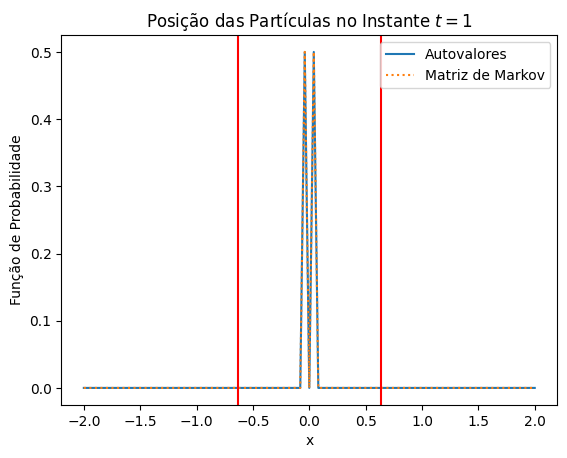

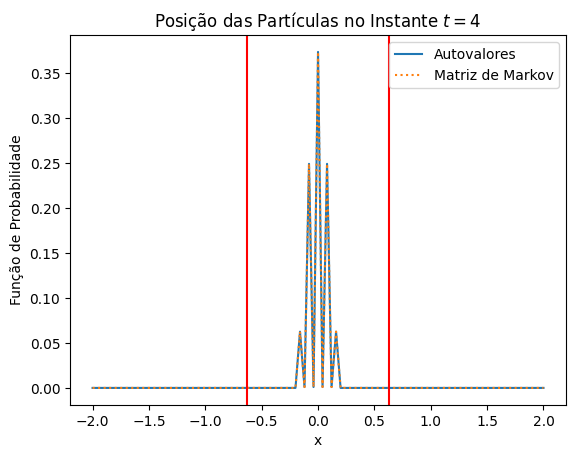

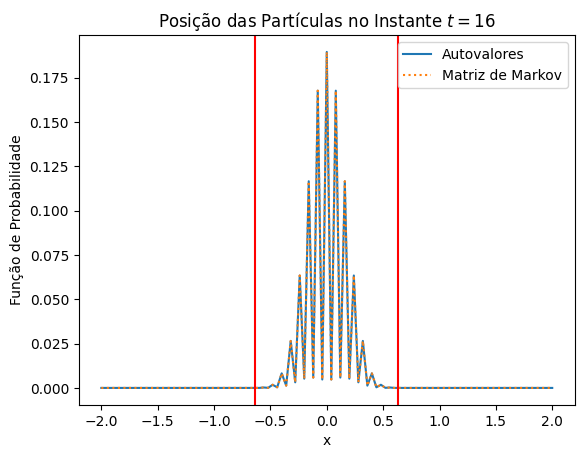

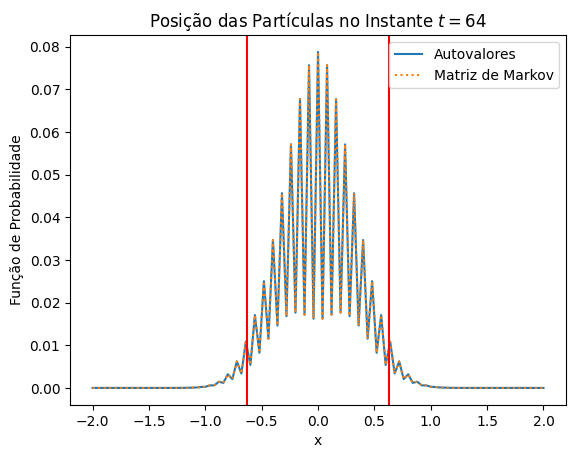

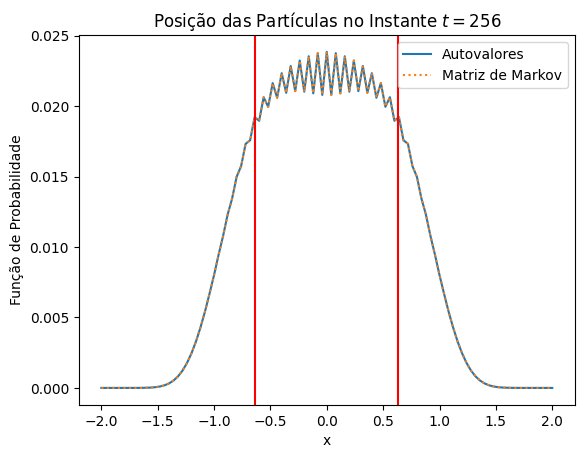

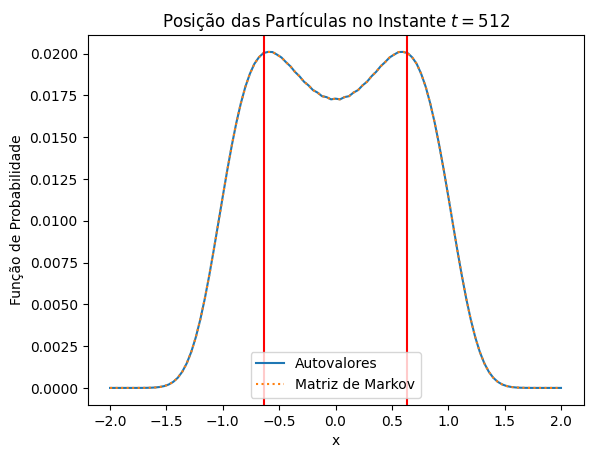

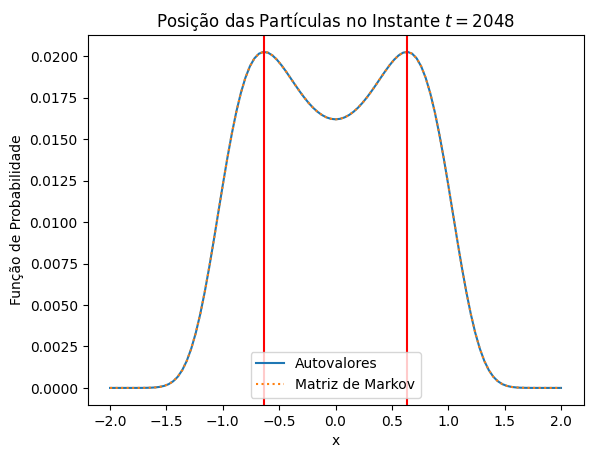

In [348]:
# Valores e vetores próprios
evals, evecsl, evecsr = sp.linalg.eig(W12c, left=True)
evals = np.array(evals)
evecsl = np.array(evecsl).T
evecsr = np.array(evecsr).T

# Temos na linha i de evecsl, evecsr o vetor próprio à esquerda, direita de valor próprio evals[i]
i = 0

erromax = 1e-8
totzeros = 0
totuns = 0
totimag = 0
for ev, el, er in zip(evals, evecsl, evecsr):
    # Verificar que a soma das componentes dos autovetores à direita é zero, como provamos que devia acontecer para valores próprios diferentes de 1 (seguindo a prova nas notas do prof.)
    if np.abs(np.sum(er)) > erromax:
        print(f"O {i}º vetor próprio de valor próprio {ev} tem componentes cuja soma é {np.sum(er)}.")
        totzeros += 1
    
    # Verificar que todos os autovalores são reais
    if np.imag(ev) > erromax:
        print(f"O {i}º valor próprio tem parte imaginária")
        totimag += 1

    
    # Escolher o vetor próprio de valor próprio 1 com componentes cuja soma é 1
    if abs(ev-1) < erromax:
        evecsr[i] = er / np.sum(er)
        totuns += 1

    # Normalizar os vetores próprios, alterando a norma dos vetores próprios à esquerda
    evecsl[i] = el / np.sum(el * er)

    i += 1

print("")

# Há apenas um valor próprio 1
if totuns == 1:
    print(f"Há exatamente um valor próprio igual a 1! Tolerância para a diferença abs(lambda - 1) de {erromax}")

if totzeros - totuns == 0:
    print(f"Todos os vetores próprios de valor próprio diferente de 1 têm componentes cuja soma é nula! Tolerância para a soma dos componentes de {erromax}")


# Todos os valores próprios são reais
if totimag == 0:
    print(f"Todos os valores próprios são reais! Tolerância para a parte imaginária de {erromax}")
    evals = np.real(evals)

D = i
print("")

# Verificar a condição de ortogonalidade
ortog = np.matmul(evecsl, evecsr.T)
for line in range(D):
    for col in range(D):
        # Entradas na diagonal devem ser 1
        if line == col and abs(ortog[line, col] - 1) > erromax:
            print(f"Erro na posição ({line, col})")
            break
    
        # Entradas fora da diagonal devem 
        elif line != col and abs(ortog[line, col]) > erromax:
            print(f"Erro na posição ({line, col})")
            break
else:
    print(f"Condição de ortogonalidade verificada com tolerância de {erromax}.")

# Projetar o estado inicial na base própria (p_i = delta_{i(D//2)})
an = evecsl[:, D//2]

# Calcular a distribuição prevista pela matriz de Markov em t diretamente e comparar com o cálculo via autovetores
for i, W in enumerate(WW12c):
    # Posições finais previstas pela matriz
    mm = W[:, D//2]
    
    # Posições finais previstas pelos autovalores
    ee = np.zeros(D)
    for k in range(D):
        ee += evals[k]**tt12b[i] * an[k] * evecsr[k]

    # Representar graficamente as distribuiçõe
    plt.plot(np.linspace(-2, 2, D), ee, label="Autovalores")
    plt.plot(np.linspace(-2, 2, D), mm, label="Matriz de Markov", linestyle="dotted")
    plt.title(f"Posição das Partículas no Instante $t = {tt12b[i]}$")
    plt.axvline(np.sqrt(beta12b-1), color="red")
    plt.axvline(-np.sqrt(beta12b-1), color="red")
    plt.xlabel("x")
    plt.ylabel("Função de Probabilidade")
    plt.legend()
    plt.show()

$\qquad$ ii.) Será que a partir do espectro de valores próprios posso “advinhar ” a escala de tempo que a dinâmica demora a equilibrar? Como poderei obter esta escala? (Lembre-se que o módulo dos valores próprios é sempre menor ou igual a 1).

# Alínea 2 d) ii)
Como os autovalores são menores que $1$ e estão elevados a $t$ isso significa que estamos perante um decaimento exponencial. Podemos então identificar como escala de tempo característica associada ao autovalor $\lambda$ o valor de $t$ que faz com que $\lambda^t$ passe a $e^{-1}$ do seu valor inicial:
$$
\begin{align*}
\frac{\lambda^t}{\lambda} = \frac1{e} &\Leftrightarrow \lambda^{t-1} = e^{-1}
\\\\
&\Leftrightarrow \ln(\lambda^{t-1}) = -1
\\\\
&\Leftrightarrow t-1 = -\frac1{\ln\lambda}
\end{align*}
$$

Logo a escala de tempo característica de toda a evolução será o maior destes valores, que corresponde ao valor de $\lambda$ distinto de $1$ mais elevado.

## Análise dos Resultados
Podemos ver que este método permite estimar a ordem de grandeza a partir da qual estamos próximos da configuração de equilíbrio!

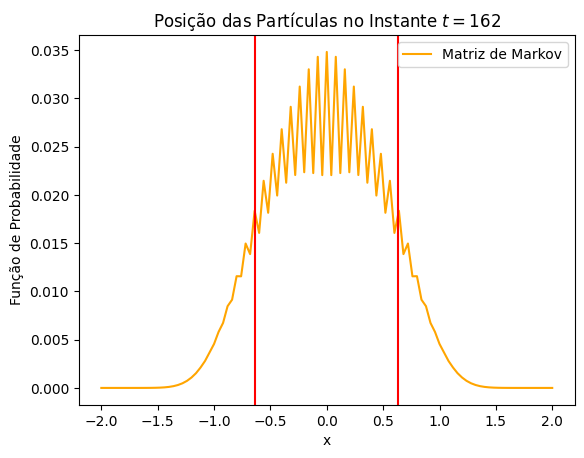

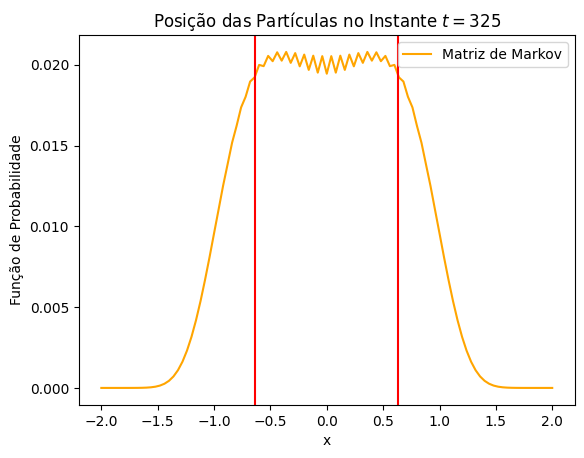

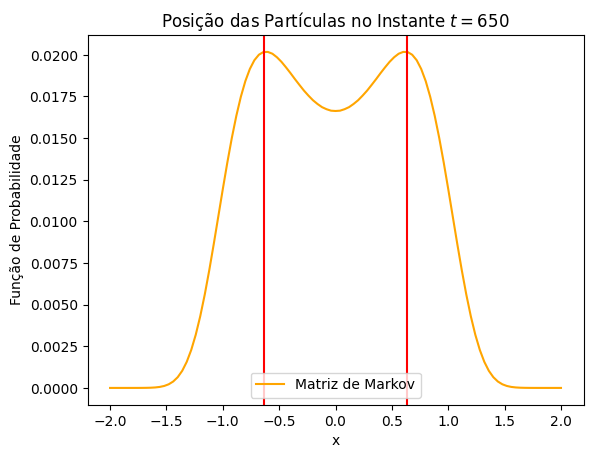

In [349]:
# Valores próprios
evals, evecsl, evecsr = sp.linalg.eig(W12c, left=True)
evals = np.array(evals)
evecsl = np.array(evecsl).T
evecsr = np.array(evecsr).T

# Determinar escala de tempo característica
maxlambda = max(abs(evals[abs(evals)<0.9999]))
maxt = -1 / np.log(maxlambda)

tt14d = np.array([int(maxt/4), int(maxt/2), int(maxt)])

# Matriz elevada a cada t
WW14d = []
for t in tt14d:
    WW14d += [np.linalg.matrix_power(W12c, t)]


# Calcular a distribuição prevista pela matriz de Markov em t e comparar com a que observamos na simulação!
for i, W in enumerate(WW14d):
    # Posições finais previstas pela matriz
    mm = W[:, D//2]

    # Representar graficamente as posições finais do passeio
    plt.plot(np.linspace(-2, 2, D), mm, label="Matriz de Markov", c="orange")
    plt.title(f"Posição das Partículas no Instante $t = {tt14d[i]}$")
    plt.axvline(np.sqrt(beta12b-1), color="red")
    plt.axvline(-np.sqrt(beta12b-1), color="red")
    plt.xlabel("x")
    plt.ylabel("Função de Probabilidade")
    plt.legend()
    plt.show()

$\qquad$ e) Para $\beta=2.4$ existem muitas diferenças com a posição inicial
quando a simulação inicia em $x=0,x=-1.5$ ou $x=1.5$: Existe apenas
uma distribuição de equilíbrio mas dependendo da distribuição inicial
pode demorar muito ($x=\pm1.5$ ) ou pouco ($x=0$) tempo a ser atingida.
À luz do espectro de valores próprios do sistema como posso entender este fenómeno?

# Alínea 2 e)
Sendo $\lambda_e = 1$ o valor próprio associado ao estado estacionário e seja $a_e$ a componente associada a $\lambda_e$ obtida projetando $P(0)$ na base própria da matriz de Markov, então atingimos a configuração estacionária quando:
$$
\begin{align*}
|\lambda_e^ta_e| \gg |\lambda_n^ta_n| \quad\forall n
\end{align*}
$$

Podemos então considerar a condição em que obrigamos o termo da esquerda a ser pelo menos $e$ vezes superior ao termo da direita:
$$
\begin{align*}
|a_e| > e|\lambda_n^ta_n| &\Leftrightarrow e|\lambda_n^t| < \left|\frac{a_e}{a_n}\right|
\\\\
&\Leftrightarrow t > \frac{\ln \left|\frac{a_e}{a_n}\right| - 1}{\ln |\lambda_n|}
\end{align*}
$$

Pois $\ln |\lambda_n| < 0$. Notamos ainda que se a fração em jogo for negativa então é porque o numerador é positivo, o que corresponde a ter $|a_e| > |a_t|$, logo $|a_e| > |\lambda_n^ta_n|$ pois $|\lambda_n| < 1$.

## Análise dos Resultados
Usando esta estimativa, vemos que o tempo necessário para o estado convergir é muito maior quando $x_0 = \pm 1.5$ do que quando $x_0 = 0$.

Fazendo uma simulação para um dos tempos habituais, vemos que apeans estamos próximos do estado de equilíbrio caso $x_0 = 0$.

O tempo mínimo para a componente dominante ser o vetor próprio escionário para x0 = 0.0 é de 246
O tempo mínimo para a componente dominante ser o vetor próprio escionário para x0 = -1.48 é de 28887
O tempo mínimo para a componente dominante ser o vetor próprio escionário para x0 = 1.48 é de 28887


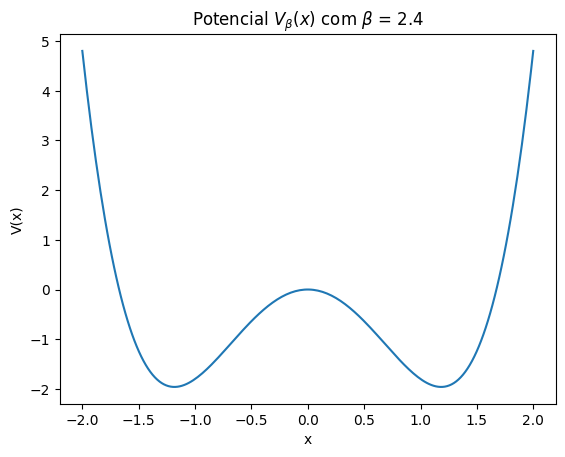

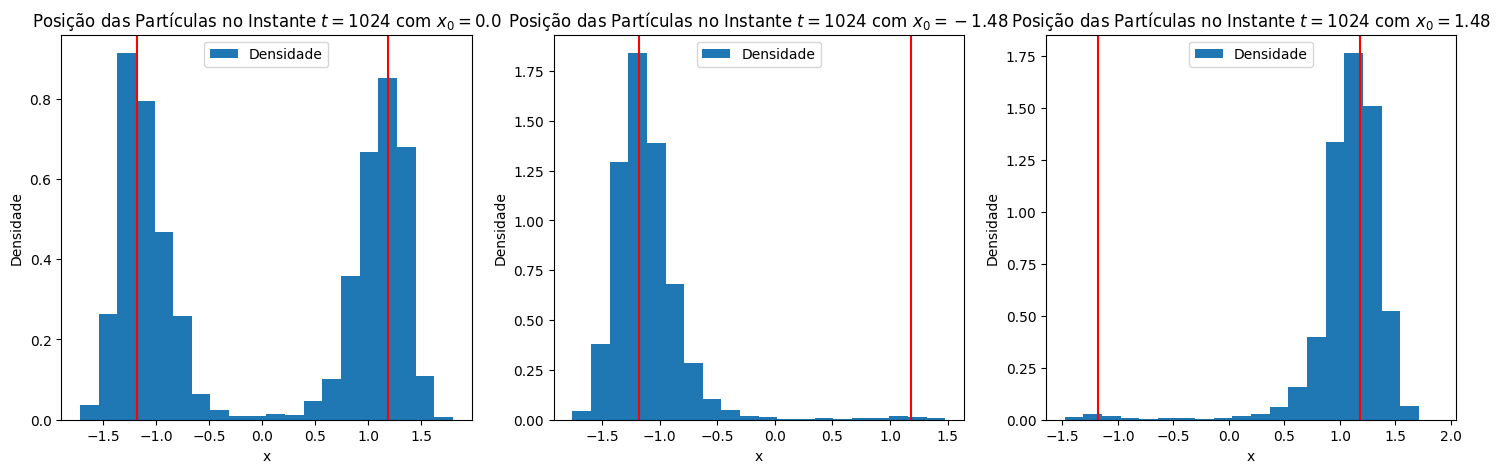

In [359]:
# Gerar amostras
delta12e = 0.04
beta12e = 2.4
V12e = gerarV(beta12e)
D = 101

# Posições iniciais (1.5 não é múltiplo inteiro de 0.04)
xx12e = np.array([0.0, -1.48, 1.48])
xx12eindex = xx12e / delta12e + D//2


# Matriz para um passo
W12e = markov(V12e, beta12e, delta12e, D)

# Valores e vetores próprios
evals, evecsl, evecsr = sp.linalg.eig(W12e, left=True)
evals = np.array(evals)
evecsl = np.array(evecsl).T
evecsr = np.array(evecsr).T

# Obter o índice correspondente a lambda = 1
indexe = np.where(abs(evals-1) < 1e-5)[0]
indexn = np.where(abs(evals-1) > 1e-5)

for i in range(len(xx12e)):
    # Projetar o estado inicial na base própria
    an = evecsl[:, int(xx12eindex[i])]

    # Calcular valores de t
    ttmin = (np.log(np.abs(an[indexe] / an[indexn])) - 1) / np.log(np.abs(evals[indexn])) 

    # Tempo máximo
    print(f"O tempo mínimo para a componente dominante ser o vetor próprio escionário para x0 = {xx12e[i]} é de {int(max(ttmin))}")


# Tempos
tt12e = [1024]

# Representar graficamente o potencial em jogo
xx = np.linspace(-2, 2, 200)
vv = V12e(xx)
plt.plot(xx, vv)
plt.title(f"Potencial $V_\\beta(x)$ com $\\beta$ = {beta12e}")
plt.xlabel("x")
plt.ylabel("V(x)")
plt.show()

N12e = 2**13
p0 = np.zeros((len(xx12e), N12e))
for i, x in enumerate(xx12e):
    p0[i,:] += x

t0 = 0
for t1 in tt12e:    
    # Juntar os gráficos 3 a 3
    cols = 3
    rows = 1
    plt.figure(figsize=(6 * cols, 5 * rows))
    for i in range(len(xx12e)):
        # Avançar t - t0 instantes
        pp = passeio1d(V12e, beta12e, delta12e, p0[i, :], t1 - t0)

        # Posição final das partículas
        ff = pp[:, t1-t0]
        
        # Representar graficamente as posições finais do passeio
        plt.subplot(rows, cols, i+1)
        plt.hist(ff, label="Densidade", bins=20, density=True)
        plt.title(f"Posição das Partículas no Instante $t = {t1}$ com $x_0 = {xx12e[i]}$")
        plt.axvline(np.sqrt(beta12e-1), color="red")
        plt.axvline(-np.sqrt(beta12e-1), color="red")
        plt.xlabel("x")
        plt.ylabel("Densidade")
        plt.legend()

        # Guardar o novo estado
        p0[i,:] = ff
    
    # Avançar no tempo
    t0 = t1
    plt.show()

## Pergunta 2

**Correlações:** Para $\beta=2$ o valor médio da posição é nulo.
Sabemos que para um determinado tempo, a distribuição de probabilidade
deixa de depender do tempo e torna-se a distribuição assimptótica
(igual para todos os tempos seguintes). Se construirmos uma amostra
de $T$ valores a partir da sequência visitada pelo passeio aleatório
para tempos superiores ao tempo de equilíbrio ($\tau$), a distribuição
de probabilidade de cada um dos valores é igual à distribuição assimptótica.
Logo o valor médio desta amostra tenderá para o valor exacto (zero),

\begin{equation}
\lim_{T\to+\infty}\frac{1}{T}\sum_{t=0}^{T-1}x(\tau+t)=0.
\end{equation}

O teorema do limite central diz-nos que o erro da medida com $T$
medições deverá ser da ordem de 
\begin{equation}
Erro(T)=\frac{\sigma}{\sqrt{T}}
\end{equation}

onde $\sigma$ é o desvio padrão de uma única medição. 

1) Estime o valor do erro do valor médio ($\langle x\rangle=0$) obtido $T$ medições consecutivas através de 
    \begin{align*}
    \overline{x}_{T}(k) & =\frac{1}{T}\sum_{t=0}^{T-1}x_{k}(\tau+t)\\
    Erro(T) & =\frac{1}{M}\sum_{k=0}^{M-1}(\overline{x}_{T}(k)-\left\langle x\right\rangle )^{2}
    \end{align*}
onde $\overline{x}_{T}(k)$ é o estimador do valor médio obtido na simulação $k$ medindo $T$ valores de posição consecutivos a partir de $t>\tau$ onde $\tau$ é um tempo maior do que o necessário para atingir o equilíbrio. O erro é o valor médio do desvio de cada estimador em relação ao valor exacto em $M$ simulações independentes.

Responda Aqui

In [351]:
# Responda Aqui

2. Note que pode estimar o desvio padrão de uma medida calculando o valor
médio 
\begin{equation}
\sigma\approx\sqrt{\frac{1}{M}\sum_{k=0}^{M-1}x_{k}^{2}(\tau)}
\end{equation}
a dispersão do ponto inicial. Será que a lei eq: \ref{eq:erro} é
verificada? Represente como função de $T$ a sua estimativa do erro
($T=1,2,4,16,64,256,1024$). Comente o resultado. 

Responda Aqui

In [352]:
# Responda Aqui

### Bom Trabalho